# XGBOOST

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 

The description of the dataset is as follows:  
Data Set Information:  
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))     
Attribute Information:  
Listing of attributes: >50K, <=50K.  
age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
         relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,     Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  
Following is the code to load required libraries and data:  
import numpy as np  
import pandas as pd  
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-databases/adult/adult.dat a', header = None) 
 
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.test' , skiprows = 1, header = None)  
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']  
train_set.columns = col_labels  
test_set.columns = col_labels 

In [44]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline


In [45]:
#Load Data set
train_set = pd.read_csv(r'C:\Users\user\Downloads\adult-training.csv',header=None) 

test_set = pd.read_csv(r'C:\Users\user\Downloads\adult-test.csv',skiprows=1,header=None)


In [46]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [49]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels 

In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [52]:
#Clean data
df = pd.concat([train_set, test_set], axis=0)
df_copy=df

In [53]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


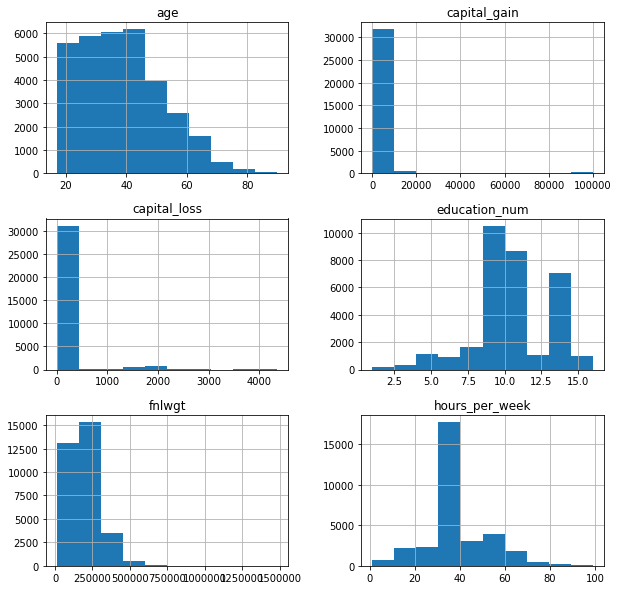

In [23]:
train_set.hist(figsize=(10,10))
plt.show()

In [57]:
train_set.dtypes 


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [58]:
for feature in col_labels:
    if train_set[feature].dtype == 'object':
        
        print(feature)
        print(" ")
        print(train_set[feature].value_counts())
        print(" ")

workclass
 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 
education
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 
marital_status
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 
occupation
 
 Prof-spec

Inference: 

    Observation: features Native_counrty, Occupation, workclass having '?' as one value which has to be handled

In [59]:
#converting the target column
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

In [60]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [61]:
#remove unknowns
df.replace(' ?', np.nan, inplace=True)

In [62]:
#sanity check after removing ?
for feature in col_labels:
    if df[feature].dtype == 'object':
        
        print(feature)
        print(" ")
        print(df[feature].value_counts())
        print(" ")

workclass
 
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64
 
education
 
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64
 
marital_status
 
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64
 
occupation
 
 Prof-specialty       6172
 Craft-rep

Inference :
    
    Removed all values with '?'

As XGboost does not support support categorcial feature we have to apply one hot encoding

In [40]:
#converting to int

In [63]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

In [64]:
df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

In [65]:
df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

In [66]:
df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

In [67]:
df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

In [68]:
df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

In [69]:
df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

In [70]:
#removing education column
df.drop('education', axis=1,inplace=True)

In [71]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Preparing data for train & test
X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)
y = np.array(df['wage_class'])

#Splitting data as train and test data 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [75]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 89), (9769, 89), (39073,), (9769,))

In [77]:
#making model1

In [79]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [81]:
xgb = XGBClassifier(**params).fit(X_train,y_train)

In [82]:
y_pred= xgb.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.8647763332992118

In [84]:
#making model2

In [85]:
eval_set = [(X_train,y_train), (X_test, y_test)]
xgb1 = XGBClassifier(**params).fit(X_train,y_train,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[0]	validation_0-error:0.159573	validation_0-logloss:0.480151	validation_1-error:0.150271	validation_1-logloss:0.4758
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.152151	validation_0-logloss:0.402273	validation_1-error:0.144539	validation_1-logloss:0.395324
[2]	validation_0-error:0.152944	validation_0-logloss:0.365939	validation_1-error:0.14587	validation_1-logloss:0.357779
[3]	validation_0-error:0.148542	validation_0-logloss:0.348037	validation_1-error:0.142696	validation_1-logloss:0.338748
[4]	validation_0-error:0.149285	validation_0-logloss:0.335694	validation_1-error:0.142287	validation_1-logloss:0.326452
[5]	validation_0-error:0.150027	validation_0-logloss:0.328347	validation_1-error:0.142901	validation_1-logloss:0.318743
[6]	validation_0-error:0.14693	validation_0-logloss:0.322912	validation_1-error:0.139318	validation_1-logloss:0.313617

[67]	validation_0-error:0.136974	validation_0-logloss:0.292205	validation_1-error:0.136452	validation_1-logloss:0.289642
[68]	validation_0-error:0.13677	validation_0-logloss:0.292047	validation_1-error:0.136043	validation_1-logloss:0.289548
[69]	validation_0-error:0.136616	validation_0-logloss:0.291184	validation_1-error:0.136247	validation_1-logloss:0.289183
[70]	validation_0-error:0.136616	validation_0-logloss:0.291137	validation_1-error:0.136145	validation_1-logloss:0.289146
[71]	validation_0-error:0.136514	validation_0-logloss:0.290868	validation_1-error:0.136452	validation_1-logloss:0.289054
[72]	validation_0-error:0.136539	validation_0-logloss:0.290797	validation_1-error:0.13635	validation_1-logloss:0.288992
[73]	validation_0-error:0.13659	validation_0-logloss:0.290754	validation_1-error:0.13635	validation_1-logloss:0.289005
[74]	validation_0-error:0.136693	validation_0-logloss:0.290635	validation_1-error:0.137169	validation_1-logloss:0.289008
[75]	validation_0-error:0.136488	val

In [86]:

y_pred1=xgb1.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred1)

0.8644692394308527

Inference:
    
n_estimators — the number of runs XGBoost will try to learn

learning_rate — learning speed

early_stopping_rounds — overfitting prevention, stop early if no improvement in learning

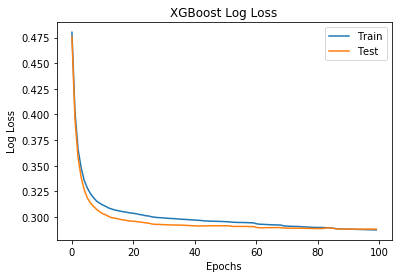

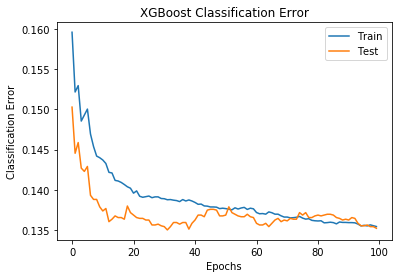

In [88]:
#Plotting Classifying errors and log loss with respect to each iteration

# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [89]:
#making model3

In [91]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200
}

In [92]:

eval_set = [(X_train,y_train), (X_test, y_test)]
xgb1 = XGBClassifier(**params).fit(X_train,y_train,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[0]	validation_0-error:0.094413	validation_0-logloss:0.686333	validation_1-error:0.154161	validation_1-logloss:0.687021
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.092442	validation_0-logloss:0.679639	validation_1-error:0.153137	validation_1-logloss:0.680995
[2]	validation_0-error:0.092391	validation_0-logloss:0.673032	validation_1-error:0.152421	validation_1-logloss:0.675117
[3]	validation_0-error:0.091828	validation_0-logloss:0.666565	validation_1-error:0.15283	validation_1-logloss:0.669337
[4]	validation_0-error:0.089576	validation_0-logloss:0.660486	validation_1-error:0.15109	validation_1-logloss:0.663652
[5]	validation_0-error:0.089422	validation_0-logloss:0.654105	validation_1-error:0.150885	validation_1-logloss:0.658094
[6]	validation_0-error:0.089499	validation_0-logloss:0.648169	validation_1-error:0.151397	validation_1-logloss:0.6526

[67]	validation_0-error:0.078699	validation_0-logloss:0.411606	validation_1-error:0.144846	validation_1-logloss:0.449838
[68]	validation_0-error:0.078648	validation_0-logloss:0.409201	validation_1-error:0.144641	validation_1-logloss:0.447882
[69]	validation_0-error:0.078264	validation_0-logloss:0.406705	validation_1-error:0.144846	validation_1-logloss:0.445935
[70]	validation_0-error:0.078289	validation_0-logloss:0.404339	validation_1-error:0.144948	validation_1-logloss:0.444049
[71]	validation_0-error:0.077931	validation_0-logloss:0.401966	validation_1-error:0.144846	validation_1-logloss:0.442163
[72]	validation_0-error:0.07788	validation_0-logloss:0.399588	validation_1-error:0.145051	validation_1-logloss:0.440303
[73]	validation_0-error:0.077803	validation_0-logloss:0.397271	validation_1-error:0.144744	validation_1-logloss:0.438485
[74]	validation_0-error:0.077522	validation_0-logloss:0.39504	validation_1-error:0.144744	validation_1-logloss:0.436659
[75]	validation_0-error:0.077419	v

[135]	validation_0-error:0.07161	validation_0-logloss:0.296069	validation_1-error:0.140035	validation_1-logloss:0.361843
[136]	validation_0-error:0.07161	validation_0-logloss:0.294975	validation_1-error:0.13983	validation_1-logloss:0.361052
[137]	validation_0-error:0.071354	validation_0-logloss:0.293705	validation_1-error:0.139421	validation_1-logloss:0.360318
[138]	validation_0-error:0.0712	validation_0-logloss:0.292542	validation_1-error:0.139728	validation_1-logloss:0.359563
[139]	validation_0-error:0.07097	validation_0-logloss:0.291361	validation_1-error:0.140137	validation_1-logloss:0.358815
[140]	validation_0-error:0.070739	validation_0-logloss:0.290192	validation_1-error:0.140137	validation_1-logloss:0.358097
[141]	validation_0-error:0.070663	validation_0-logloss:0.289061	validation_1-error:0.140342	validation_1-logloss:0.357393
[142]	validation_0-error:0.070509	validation_0-logloss:0.287954	validation_1-error:0.140649	validation_1-logloss:0.356678
[143]	validation_0-error:0.070

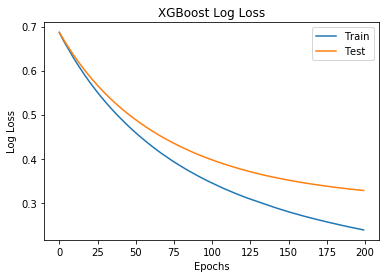

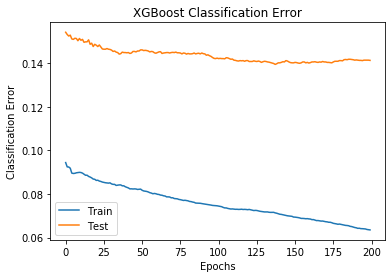

In [93]:
#Plot
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

Inference:
    
    By adjusting parameters accuracy can be improved

In [94]:
#XGBoost
#https://xgboost.readthedocs.io/en/latest/parameter.html

In [95]:
#Import Xgboost
import xgboost as xgb

In [96]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [97]:
#creating watchlist of training
# to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [98]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100

In [99]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[0]	train-auc:0.869609	eval-auc:0.860627
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 15 rounds.
[1]	train-auc:0.884622	eval-auc:0.869417
[2]	train-auc:0.891884	eval-auc:0.872458
[3]	train-auc:0.89626	eval-auc:0.874902
[4]	train-auc:0.900402	eval-auc:0.874741
[5]	train-auc:0.903864	eval-auc:0.876983
[6]	train-auc:0.906131	eval-auc:0.876641
[7]	train-auc:0.907914	eval-auc:0.876285
[8]	train-auc:0.910044	eval-auc:0.874573
[9]	train-auc:0.911011	eval-auc:0.873528
[10]	train-auc:0.913219	eval-auc:0.872416
[11]	train-auc:0.916204	eval-auc:0.872657
[12]	train-auc:0.919209	eval-auc:0.869809
[13]	train-auc:0.919848	eval-auc:0.870452
[14]	train-auc:0.921458	eval-auc:0.871217
[15]	train-auc:0.922355	eval-auc:0.871446
[16]	train-auc:0.923548	eval-auc:0.871054
[17]	train-auc:0.924436	eval-auc:0.870505
[18]	train-auc:0.925324	eval-auc:0.870843
[19]	train-auc:0.926488	eval-auc:0.869566
[20]	train-auc:0.928447	eval-a

Inference:
    
    train accuracy:0.903864  Test accuracy:0.876983

In [100]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

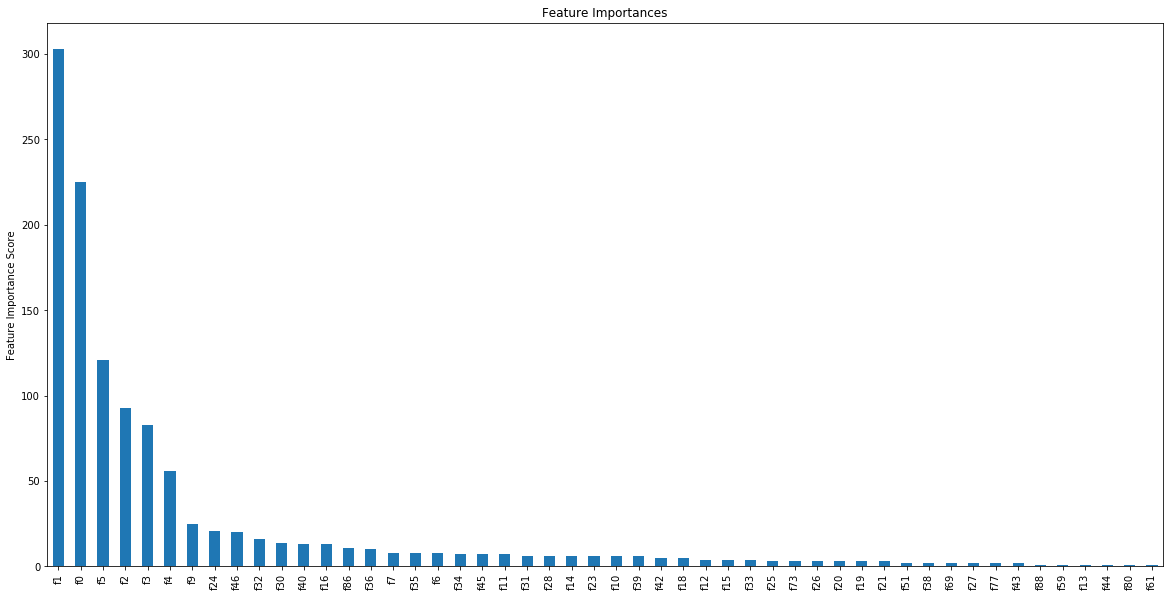

In [101]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()